## Question 1

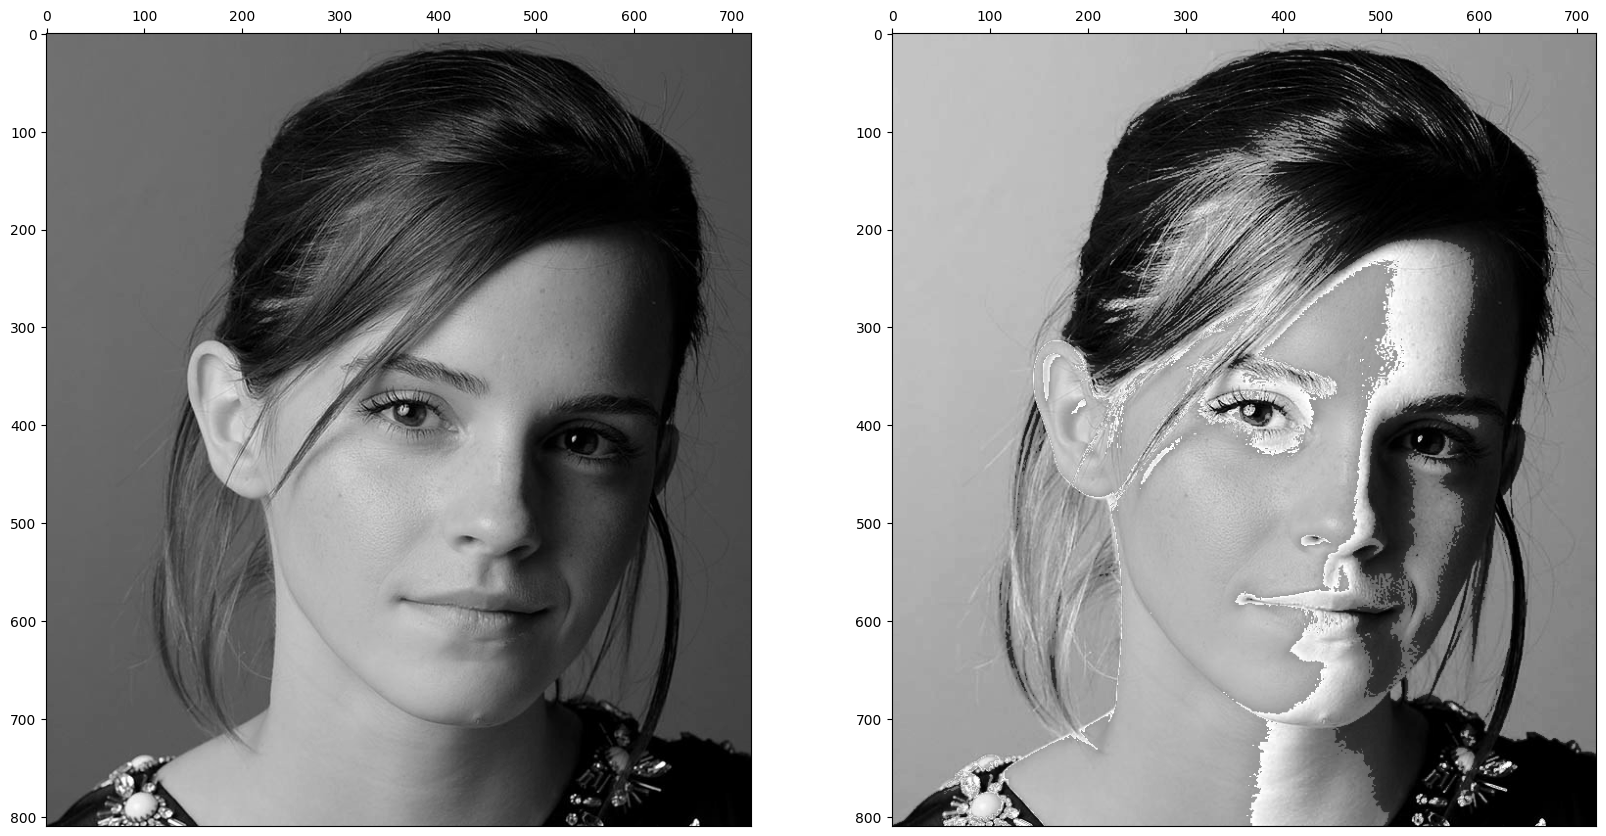

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
  
# Intensity Output Function
def pixelVal(pix, r1, s1, r2, s2, r3, s3, r4, s4):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    elif (r2 < pix and pix <= r3):
        return ((s3 - s2)/(r3 - r2)) * (pix - r2) + s2
    else:
        return ((255 - s4)/(255 - r4)) * (pix - r4) + s4
  
# Open the image.
img = cv.imread('D:\Electronics and Automation\EN 5204_Vision Based Automation\Assignment 01\emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None 
  
# Define the coordinates of the intensity function plot
r1 = 50
s1 = 50
r2 = 50
s2 = 100
r3 = 150
s3 = 255
r4 = 150
s4 = 150
  
# Vectorizing the intensity function to be applied in the numpy
pixelVal_vec = np.vectorize(pixelVal)
  
# Piece-wise Linear Intensity Transformation
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2, r3, s3, r4, s4)

fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].xaxis.tick_top()
ax[1].imshow(contrast_stretched, cmap='gray', vmin=0, vmax=255)
ax[1].xaxis.tick_top()
plt.savefig('Transform')
plt.show()
